## Covid-19 Regression Model Analysis - Hospitalisations

#### Comparison of the performance for the Linear Regression model using the "Lasso", "Ridge" and "ElasticNet" models.

#### Comparison of the performance for the Polynomial Regression model on Covid data.
#### Polynomial regression provides the relationship between the dependent variable Y and the independent variable X
#### and is modeled as 2nd, 3rd, 4th, and 5th-degree polynomial in x.


In [1]:
#   Import dependencies
import operator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from datetime import datetime
from scipy.stats import linregress


In [2]:
#   Read the csv file into a pandas DataFrame
df = pd.read_csv('../CSVs/merged_covid_cases_hosp_data.csv', 
                 parse_dates=['date'])
df


,Unnamed: 0,Id,country_id,date,confirmed,deaths,recovered,active,Daily hospital occupancy
0,0,6232,AUS,2020-01-22,0,0,0,0,441.0
1,1,6233,AUS,2020-01-23,0,0,0,0,415.0
2,2,6234,AUS,2020-01-24,0,0,0,0,457.0
3,3,6235,AUS,2020-01-25,0,0,0,0,490.0
4,4,6236,AUS,2020-01-26,4,0,0,4,457.0
...,...,...,...,...,...,...,...,...,...
29597,29597,136320,USA,2022-03-06,79276278,958819,0,78317459,0.0
29598,29598,136321,USA,2022-03-07,79339388,960505,0,78378883,0.0
29599,29599,136322,USA,2022-03-08,79369007,961843,0,78407164,0.0
29600,29600,136323,USA,2022-03-09,79406602,963819,0,78442783,0.0


In [3]:
#   Get the info for the df
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29602 entries, 0 to 29601
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                29602 non-null  int64         
 1   Id                        29602 non-null  int64         
 2   country_id                29602 non-null  object        
 3   date                      29602 non-null  datetime64[ns]
 4   confirmed                 29602 non-null  int64         
 5   deaths                    29602 non-null  int64         
 6   recovered                 29602 non-null  int64         
 7   active                    29602 non-null  int64         
 8   Daily hospital occupancy  29602 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(6), object(1)
memory usage: 2.0+ MB


In [4]:
df.columns

Index(['Unnamed: 0', 'Id', 'country_id', 'date', 'confirmed', 'deaths',
       'recovered', 'active', 'Daily hospital occupancy'],
      dtype='object')

In [5]:
#   Drop 'Unnamed: 0' - not sure where it came from - it's not in the source CSV file
df.drop('Unnamed: 0', axis=1, inplace=True)
df


,Id,country_id,date,confirmed,deaths,recovered,active,Daily hospital occupancy
0,6232,AUS,2020-01-22,0,0,0,0,441.0
1,6233,AUS,2020-01-23,0,0,0,0,415.0
2,6234,AUS,2020-01-24,0,0,0,0,457.0
3,6235,AUS,2020-01-25,0,0,0,0,490.0
4,6236,AUS,2020-01-26,4,0,0,4,457.0
...,...,...,...,...,...,...,...,...
29597,136320,USA,2022-03-06,79276278,958819,0,78317459,0.0
29598,136321,USA,2022-03-07,79339388,960505,0,78378883,0.0
29599,136322,USA,2022-03-08,79369007,961843,0,78407164,0.0
29600,136323,USA,2022-03-09,79406602,963819,0,78442783,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29602 entries, 0 to 29601
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        29602 non-null  int64         
 1   country_id                29602 non-null  object        
 2   date                      29602 non-null  datetime64[ns]
 3   confirmed                 29602 non-null  int64         
 4   deaths                    29602 non-null  int64         
 5   recovered                 29602 non-null  int64         
 6   active                    29602 non-null  int64         
 7   Daily hospital occupancy  29602 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 1.8+ MB


In [7]:
# Use Pandas get_dummies to convert categorical data
df = pd.get_dummies(df)
df


,Id,date,confirmed,deaths,recovered,active,Daily hospital occupancy,country_id_AUS,country_id_AUT,country_id_BEL,...,country_id_NOR,country_id_POL,country_id_PRT,country_id_ROU,country_id_SRB,country_id_SVK,country_id_SVN,country_id_SWE,country_id_USA,country_id_ZAF
0,6232,2020-01-22,0,0,0,0,441.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6233,2020-01-23,0,0,0,0,415.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6234,2020-01-24,0,0,0,0,457.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6235,2020-01-25,0,0,0,0,490.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6236,2020-01-26,4,0,0,4,457.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29597,136320,2022-03-06,79276278,958819,0,78317459,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
29598,136321,2022-03-07,79339388,960505,0,78378883,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
29599,136322,2022-03-08,79369007,961843,0,78407164,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
29600,136323,2022-03-09,79406602,963819,0,78442783,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [8]:
#   Don't think we need this but will retain in case of future use
#   Use 'resample' to convert daily data to monthly data
#df_mthly = df.set_index('date').resample('M')["confirmed", "deaths", "recovered", "active"].mean()
#df_mthly


<AxesSubplot:>

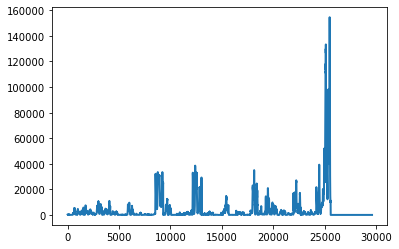

In [9]:
#   Plot the hospitalisation dat frame to check that it works
df['Daily hospital occupancy'].plot(linewidth=2)


In [10]:
#   Don't think we need this but will retain in case of future use
#   Save monthly covid cases data
#df_mthly.to_csv('../CSVs/covid_cases_mthly.csv')


In [11]:
# Assign X (data) and y (target)
#X = df_mthly[['confirmed', deaths', 'recovered', 'active']]
# y = df_mthly['Daily hospital occupancy'].values.reshape(-1, 1)
# print(X.shape, y.shape)

X = df[['confirmed', 'deaths', 'recovered', 'active']]
y = df["Daily hospital occupancy"].values.reshape(-1, 1)
print(X.shape, y.shape)


(29602, 4) (29602, 1)


In [12]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [13]:
# Create a StandardScater model and fit it to the training data
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)


In [14]:
# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)


In [15]:
# Create a LinearRegression model and fit it to the scaled training data

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)


LinearRegression()

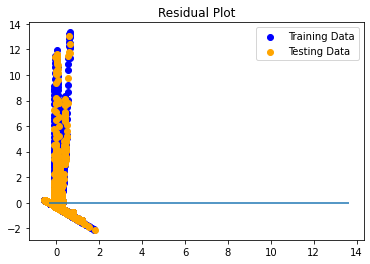

In [16]:
# Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values
# Hint: You can predict values of X training and testing data using the model.predict() method on a fitted model

predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), y_train_scaled - model.predict(X_train_scaled), c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), y_test_scaled - model.predict(X_test_scaled), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()


In [17]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")


MSE: 0.9641377531070696, R2: 0.02186819167795484


In [18]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")


MSE: 0.9645622425580077, R2: 0.02143754094062844


In [19]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")


MSE: 0.9641463684222826, R2: 0.021859451315053957


In [20]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")


MSE: 0.9643742358256336, R2: 0.021628276511890143


## Comparison of the performance for the Polynomial Regression model on Covid data
#### Polynomial regression provides the relationship between the dependent variable Y and the independent variable X and is
#### modeled as 2nd, 3rd, 4th, and 5th-degree polynomial in x. 

In [21]:
#   Assign X (data) and y (target)
X = df[['confirmed', 'deaths', 'recovered', 'active']]
y = df["Daily hospital occupancy"].values.reshape(-1, 1)
print(X.shape, y.shape)


(29602, 4) (29602, 1)


In [22]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [23]:
# Create a StandardScater model and fit it to the training data
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)


In [24]:
# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)


In [25]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=5)
# transforms the existing features to higher degree features.
X_train_poly = poly_features.fit_transform(X_train)
# fit the transformed features to Linear Regression
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)


LinearRegression()

In [26]:
# predicting on training data-set
y_train_predicted = poly_model.predict(X_train_poly)
# predicting on test data-set
y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
# predicting on test data-set
y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
# evaluating the model on training dataset
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
r2_train = r2_score(y_train, y_train_predicted)
# evaluating the model on test dataset
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
r2_test = r2_score(y_test, y_test_predict)
print("The model performance for the training set")
print("-------------------------------------------")
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_train))

print("\n")

print("The model performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))


The model performance for the training set
-------------------------------------------
RMSE of training set is 10601.178676057
R2 score of training set is 0.039080959240263224


The model performance for the test set
-------------------------------------------
RMSE of test set is 11295.829589249508
R2 score of test set is -0.10680993137539074


## Try Linear Regression on Combined Cases and Hospitalisations

The r-squared value is: 0.002416635722578477
The correlation between Confirmed Cases and Daily Hospitalisations is: -0.049159289280648444


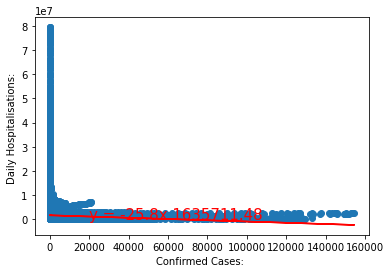

In [27]:
x_axis = df["Daily hospital occupancy"]
y_axis = df["confirmed"]
plt.xlabel("Confirmed Cases: ")
plt.ylabel("Daily Hospitalisations: ")
plt.scatter(x_axis, y_axis, marker="o")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(20000,8),fontsize=15,color="red")
print(f"The r-squared value is: {rvalue**2}")
print(f"The correlation between Confirmed Cases and Daily Hospitalisations is: {rvalue}")


## Try Measuring Bias and Variance
#### Refer 'bias_variance' notebook for this
